In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [5]:
weather = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
weather.shape

(8425, 23)

In [7]:
weather.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
weather.dtypes.to_frame('data type')

,data type
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


from above i confirm the dataset contains just two data type of object and float data type. with 8425 rows and 23 columns with null values

In [9]:
weather.nunique().to_frame('number of unique values in the dataset')

,number of unique values in the dataset
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


Now moving ahead by filling the null values 

In [10]:
for i in weather:
    if weather[i].dtypes!='object':
        weather[i]=weather[i].fillna(weather[i].mean())
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [11]:
for i in weather:
    if weather[i].dtypes=='object':
        weather[i]=weather[i].fillna(weather[i].mode()[0])
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [12]:
weather.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather.set_index('Date', inplace = True)

<AxesSubplot:ylabel='Date'>

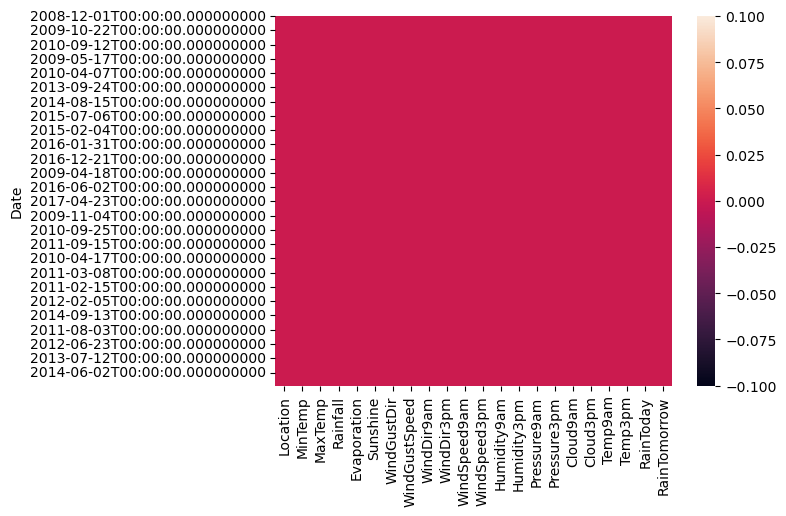

In [14]:
sns.heatmap(weather.isnull())

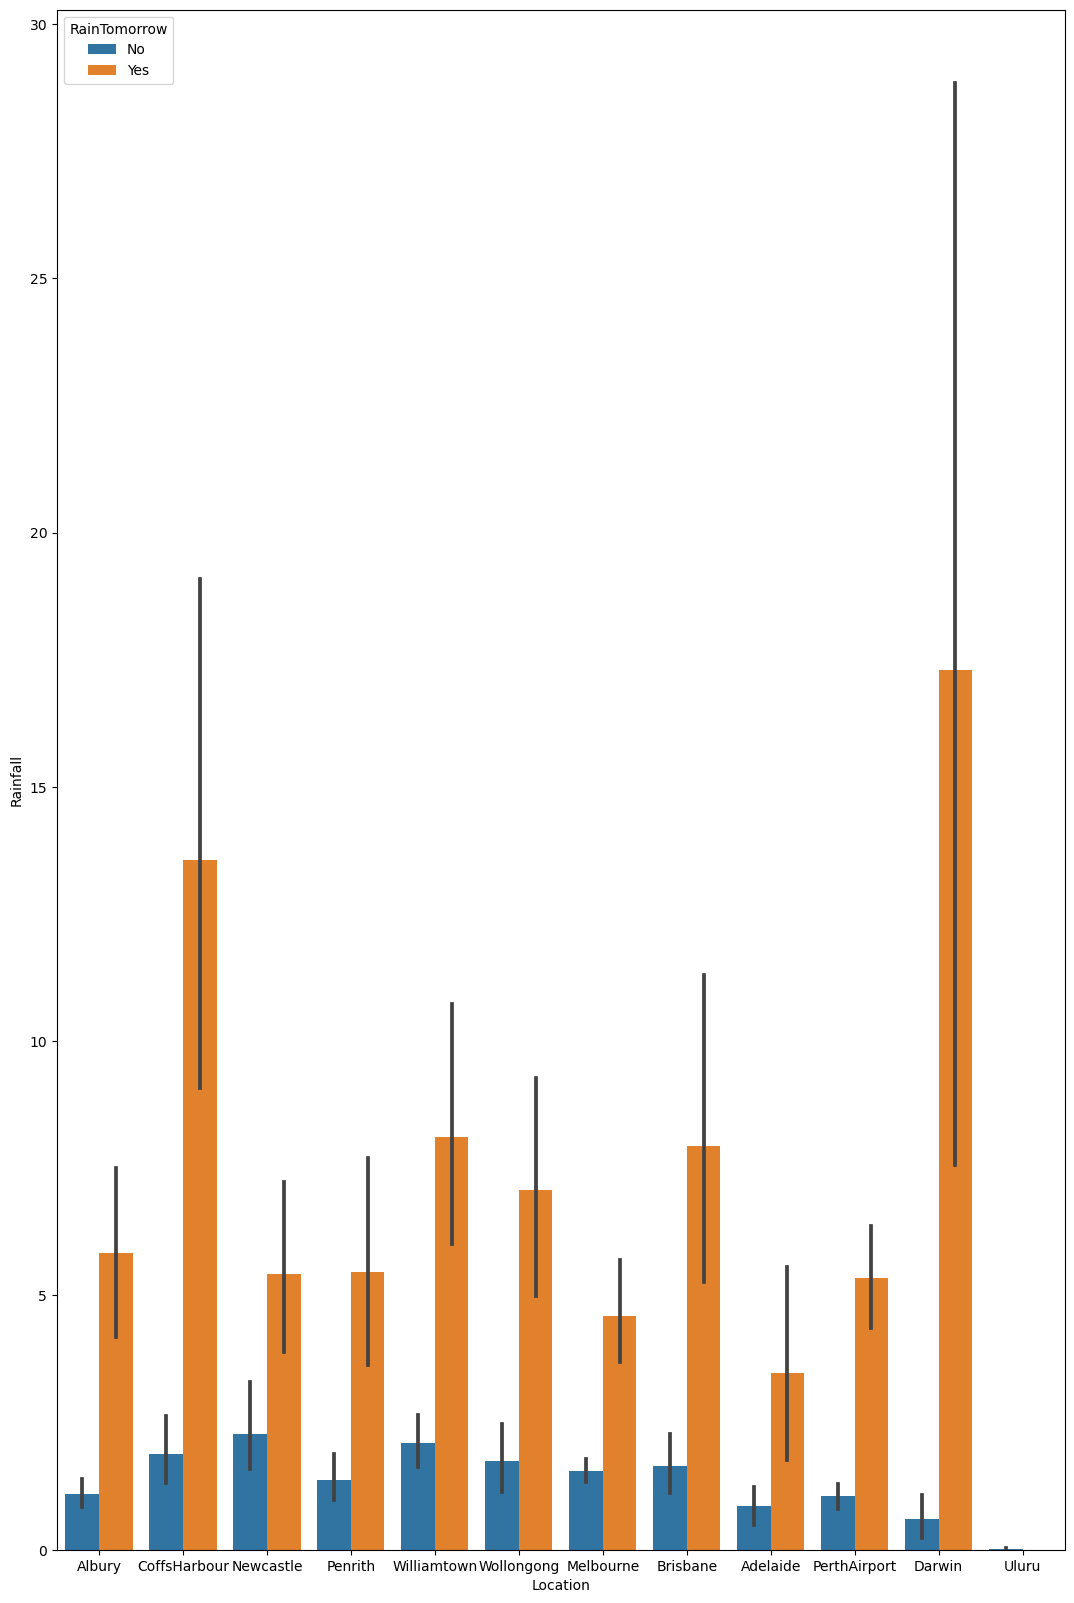

In [15]:
plt.figure(figsize=(13,20))
sns.barplot(x = 'Location', y='Rainfall', data = weather, hue = 'RainTomorrow')
plt.show()

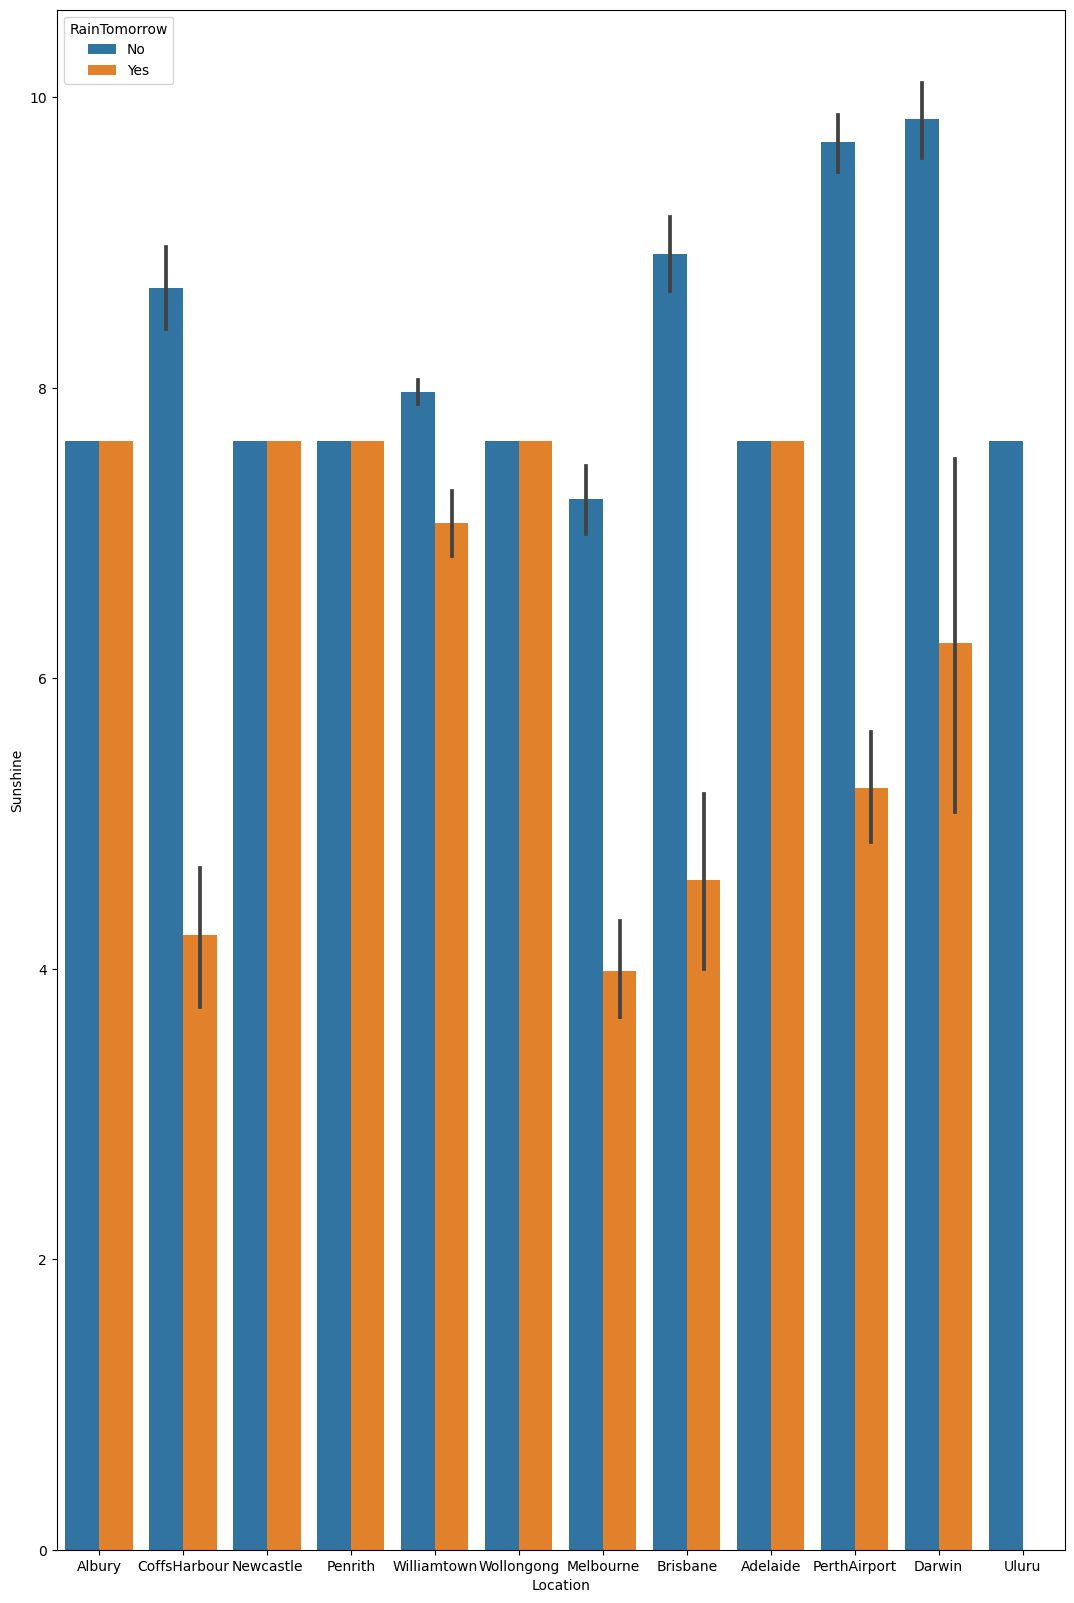

In [16]:
plt.figure(figsize=(13,20))
sns.barplot(x = 'Location', y='Sunshine', data = weather, hue = 'RainTomorrow')
plt.show()

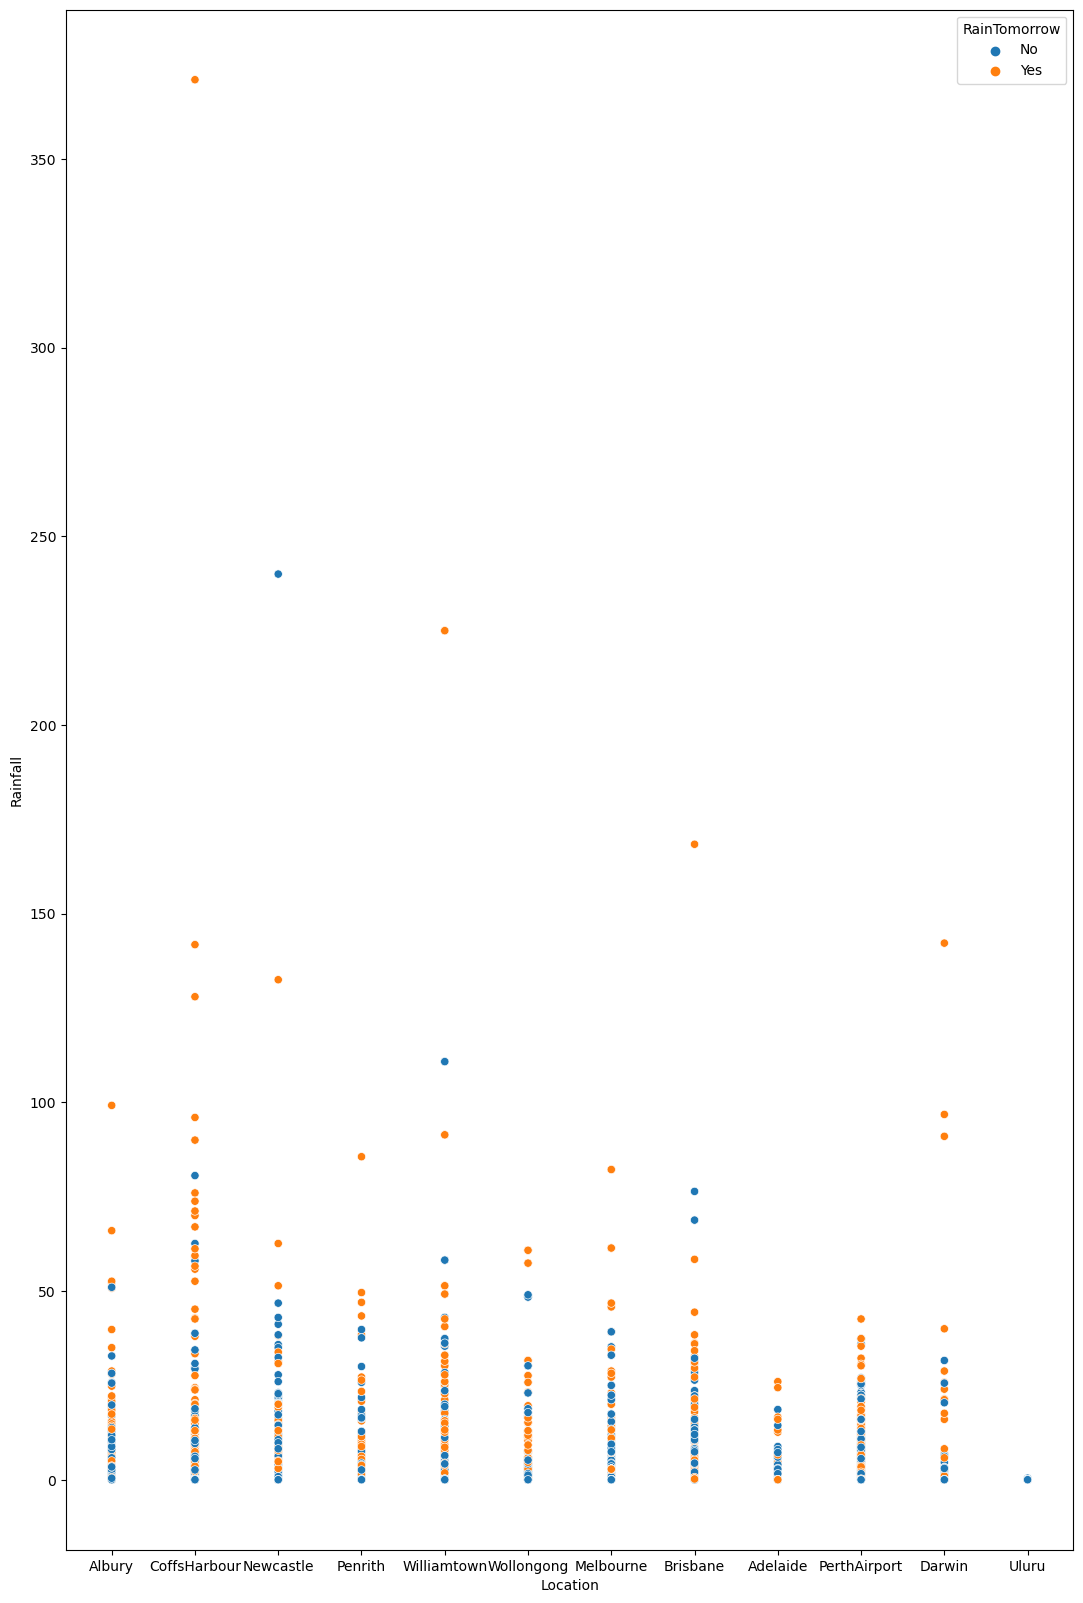

In [17]:
plt.figure(figsize=(13,20))
sns.scatterplot(x = 'Location', y='Rainfall', data = weather, hue = 'RainTomorrow')
plt.show()

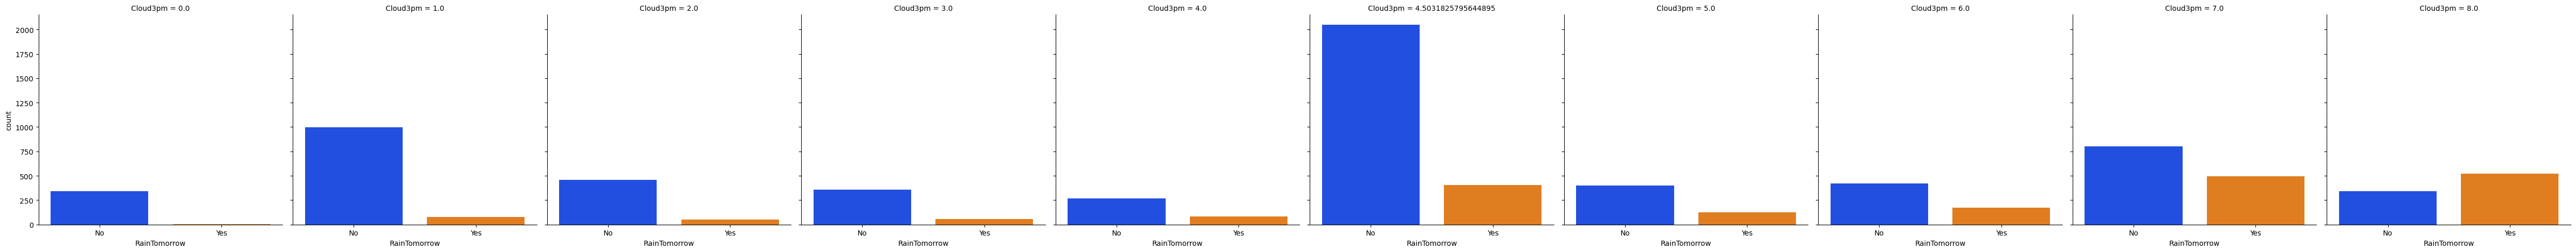

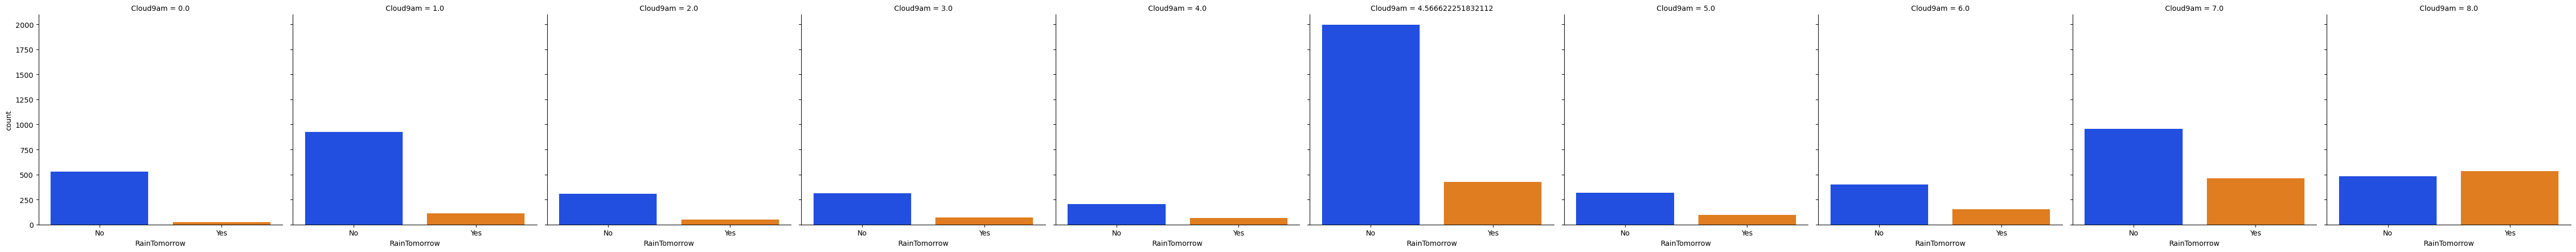

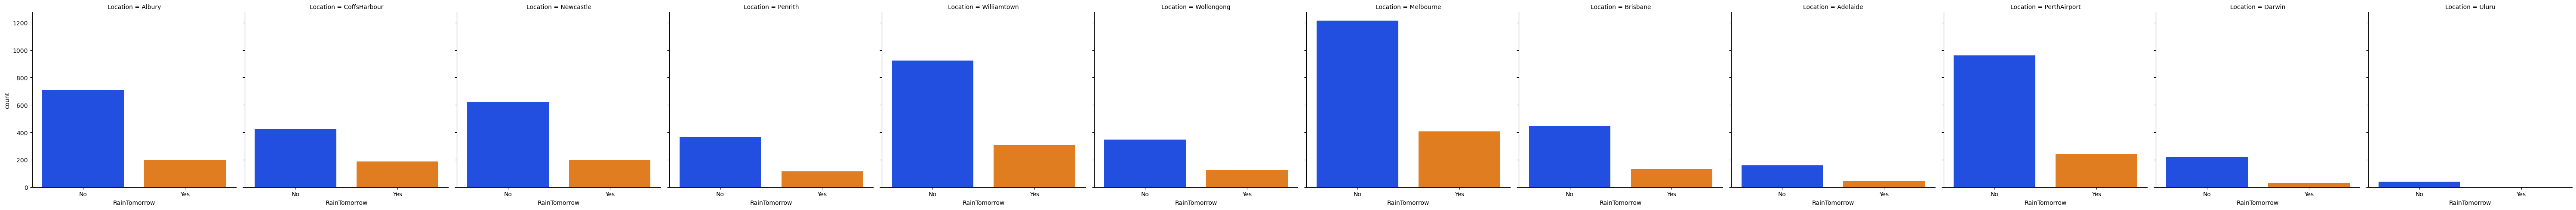

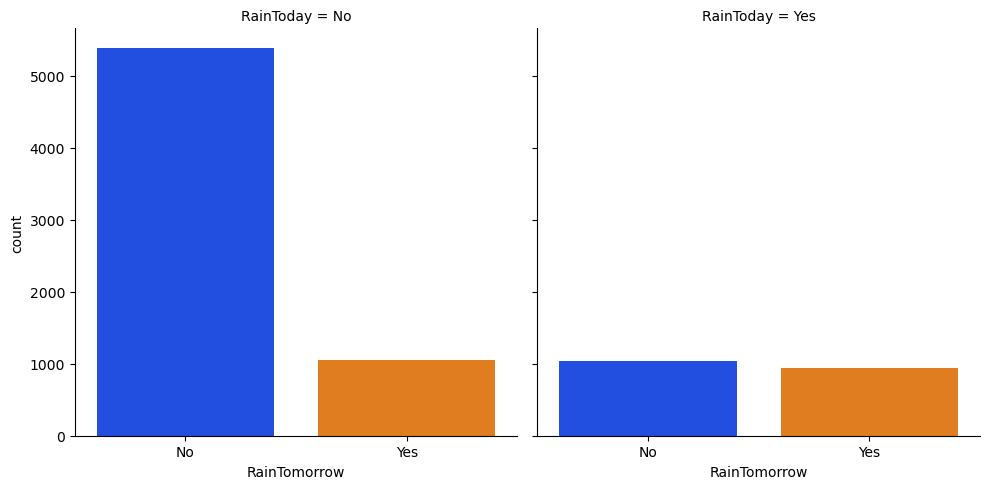

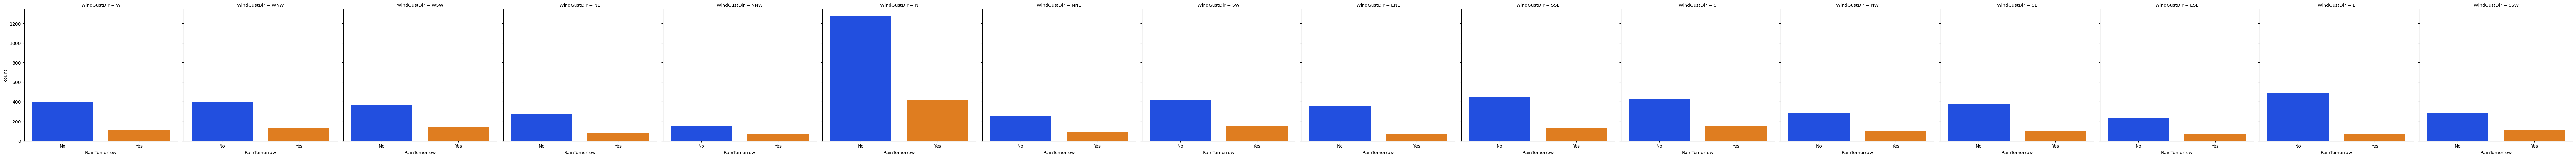

In [18]:
sns.catplot(x = 'RainTomorrow', col = 'Cloud3pm', data = weather, kind = 'count', palette = 'bright')
sns.catplot(x = 'RainTomorrow', col = 'Cloud9am', data = weather, kind = 'count', palette = 'bright')
sns.catplot(x = 'RainTomorrow', col = 'Location', data = weather, kind = 'count', palette = 'bright')
sns.catplot(x = 'RainTomorrow', col = 'RainToday', data = weather, kind = 'count', palette = 'bright')
sns.catplot(x = 'RainTomorrow', col = 'WindGustDir', data = weather, kind = 'count', palette = 'bright')
plt.show()

In [19]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


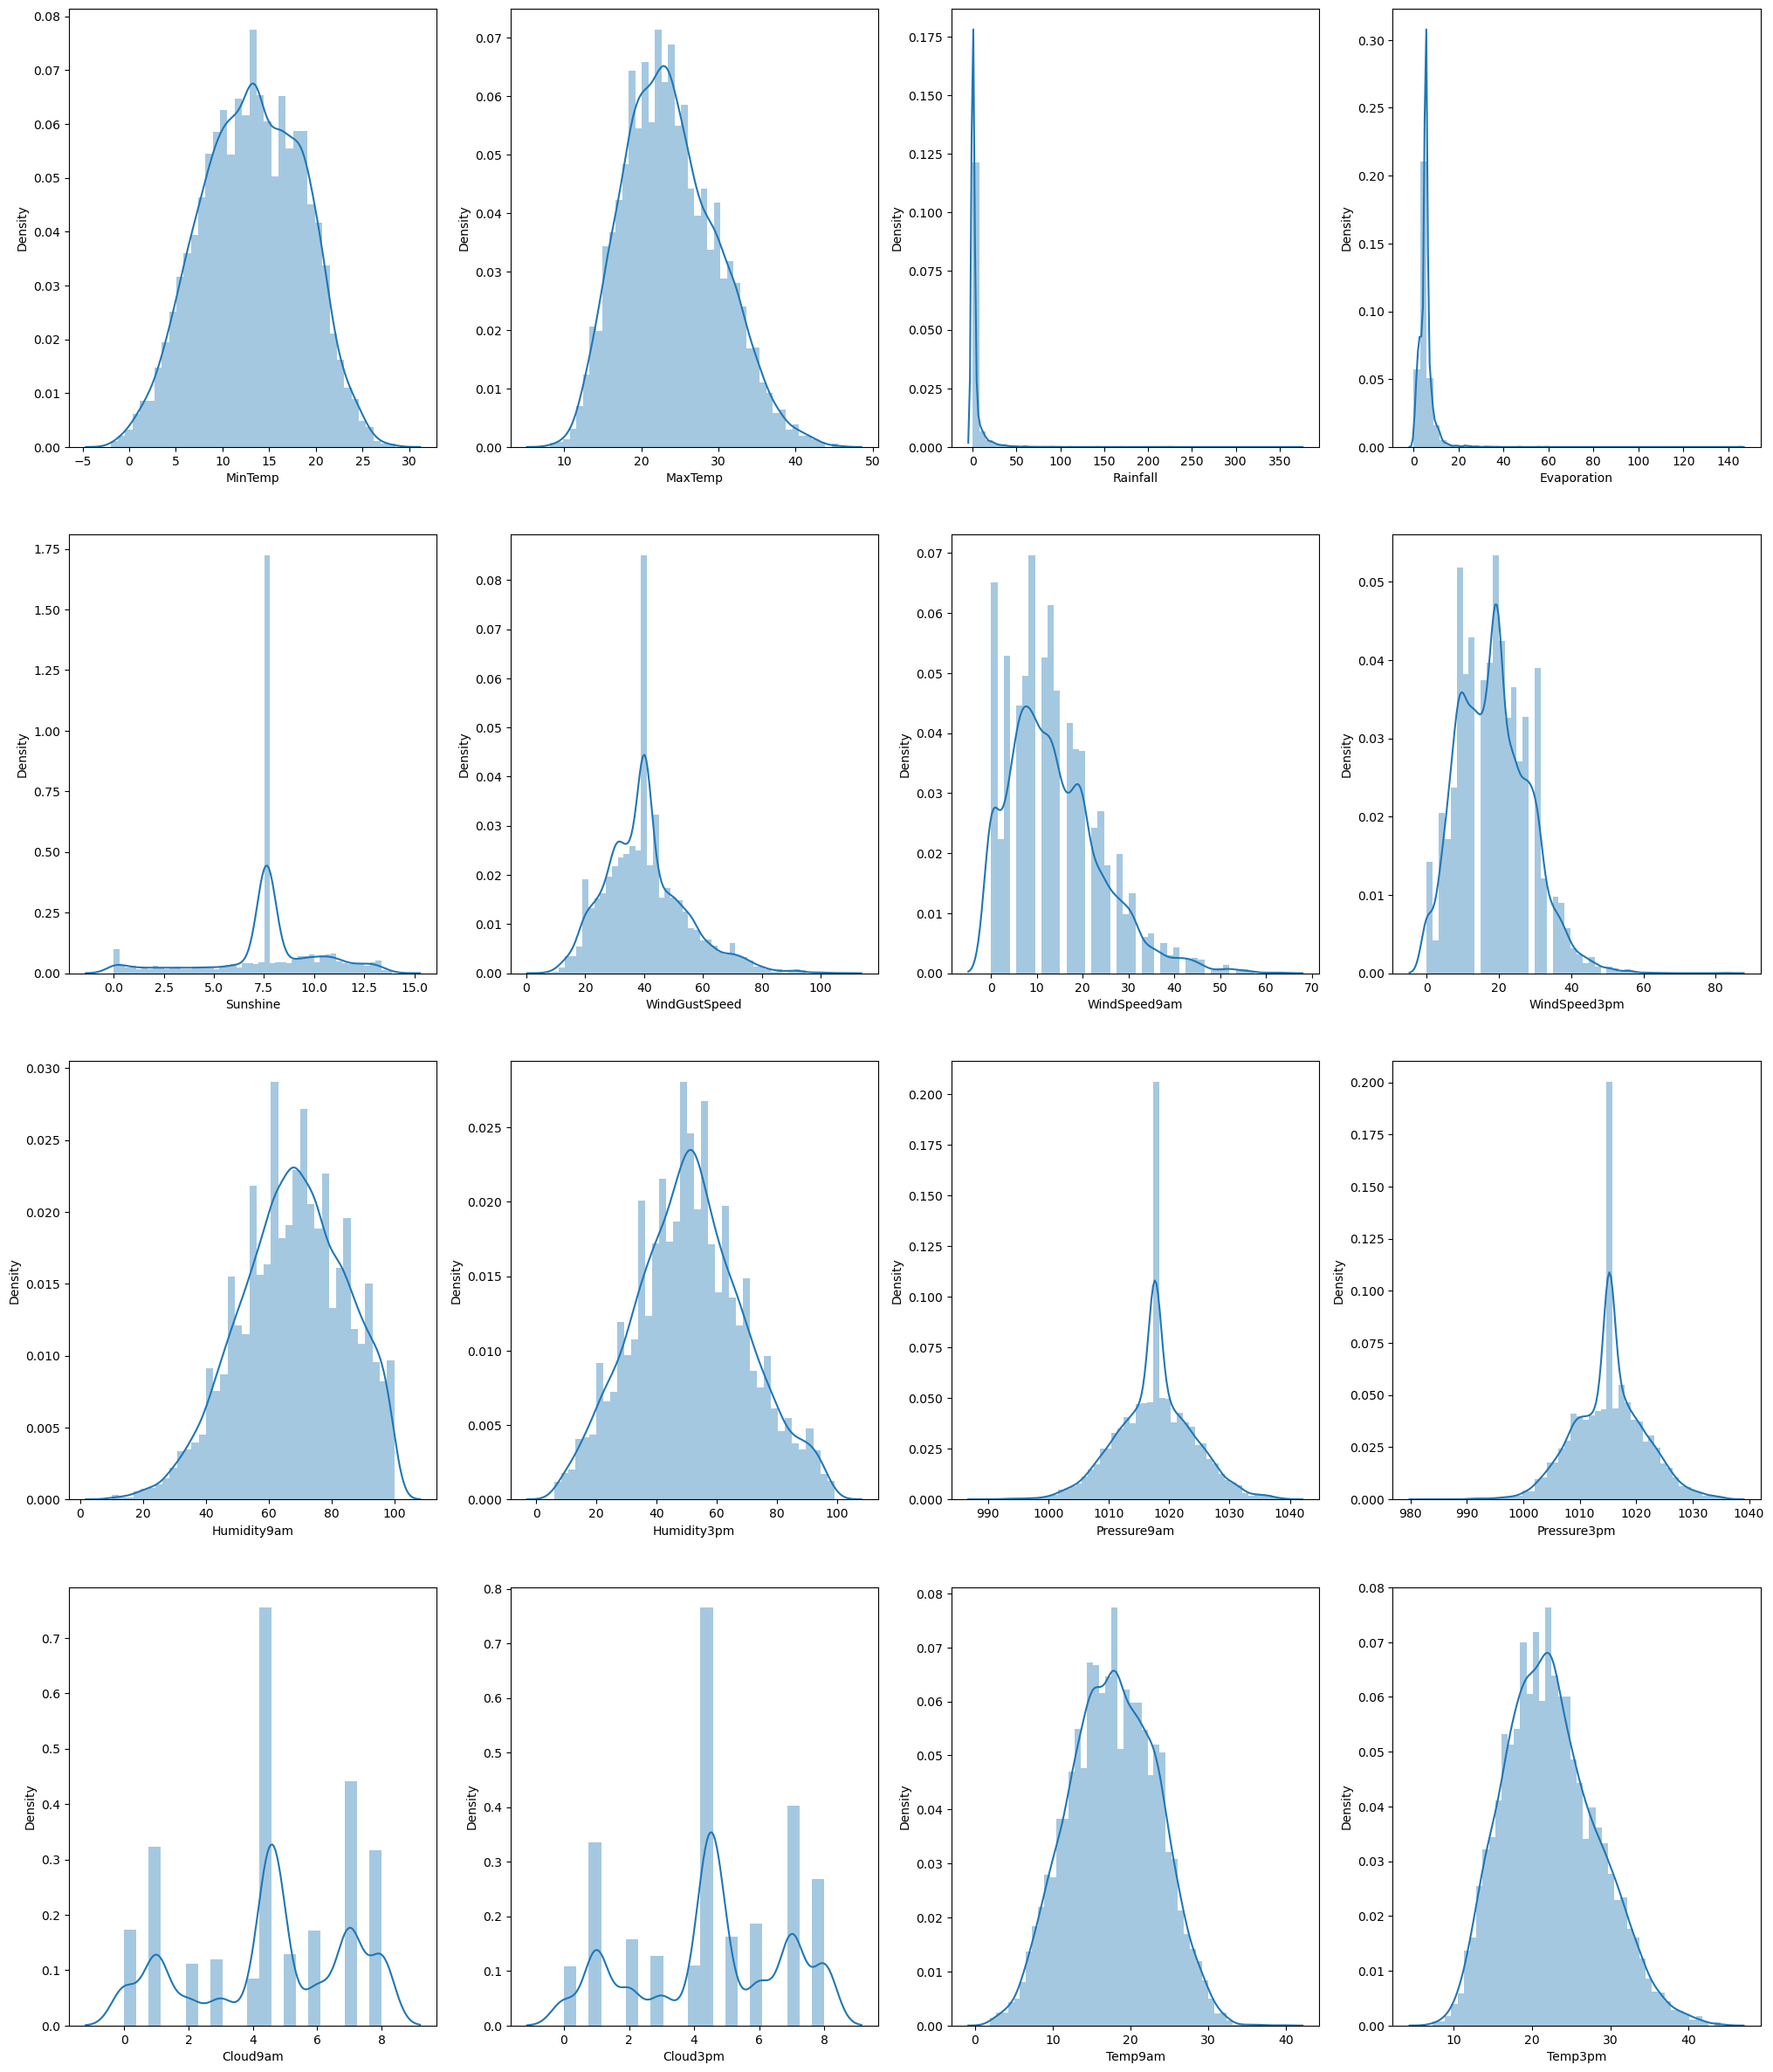

In [20]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in weather.columns:
    if pd.api.types.is_numeric_dtype(weather[column]):
        if plotnumber<=16:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(weather[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

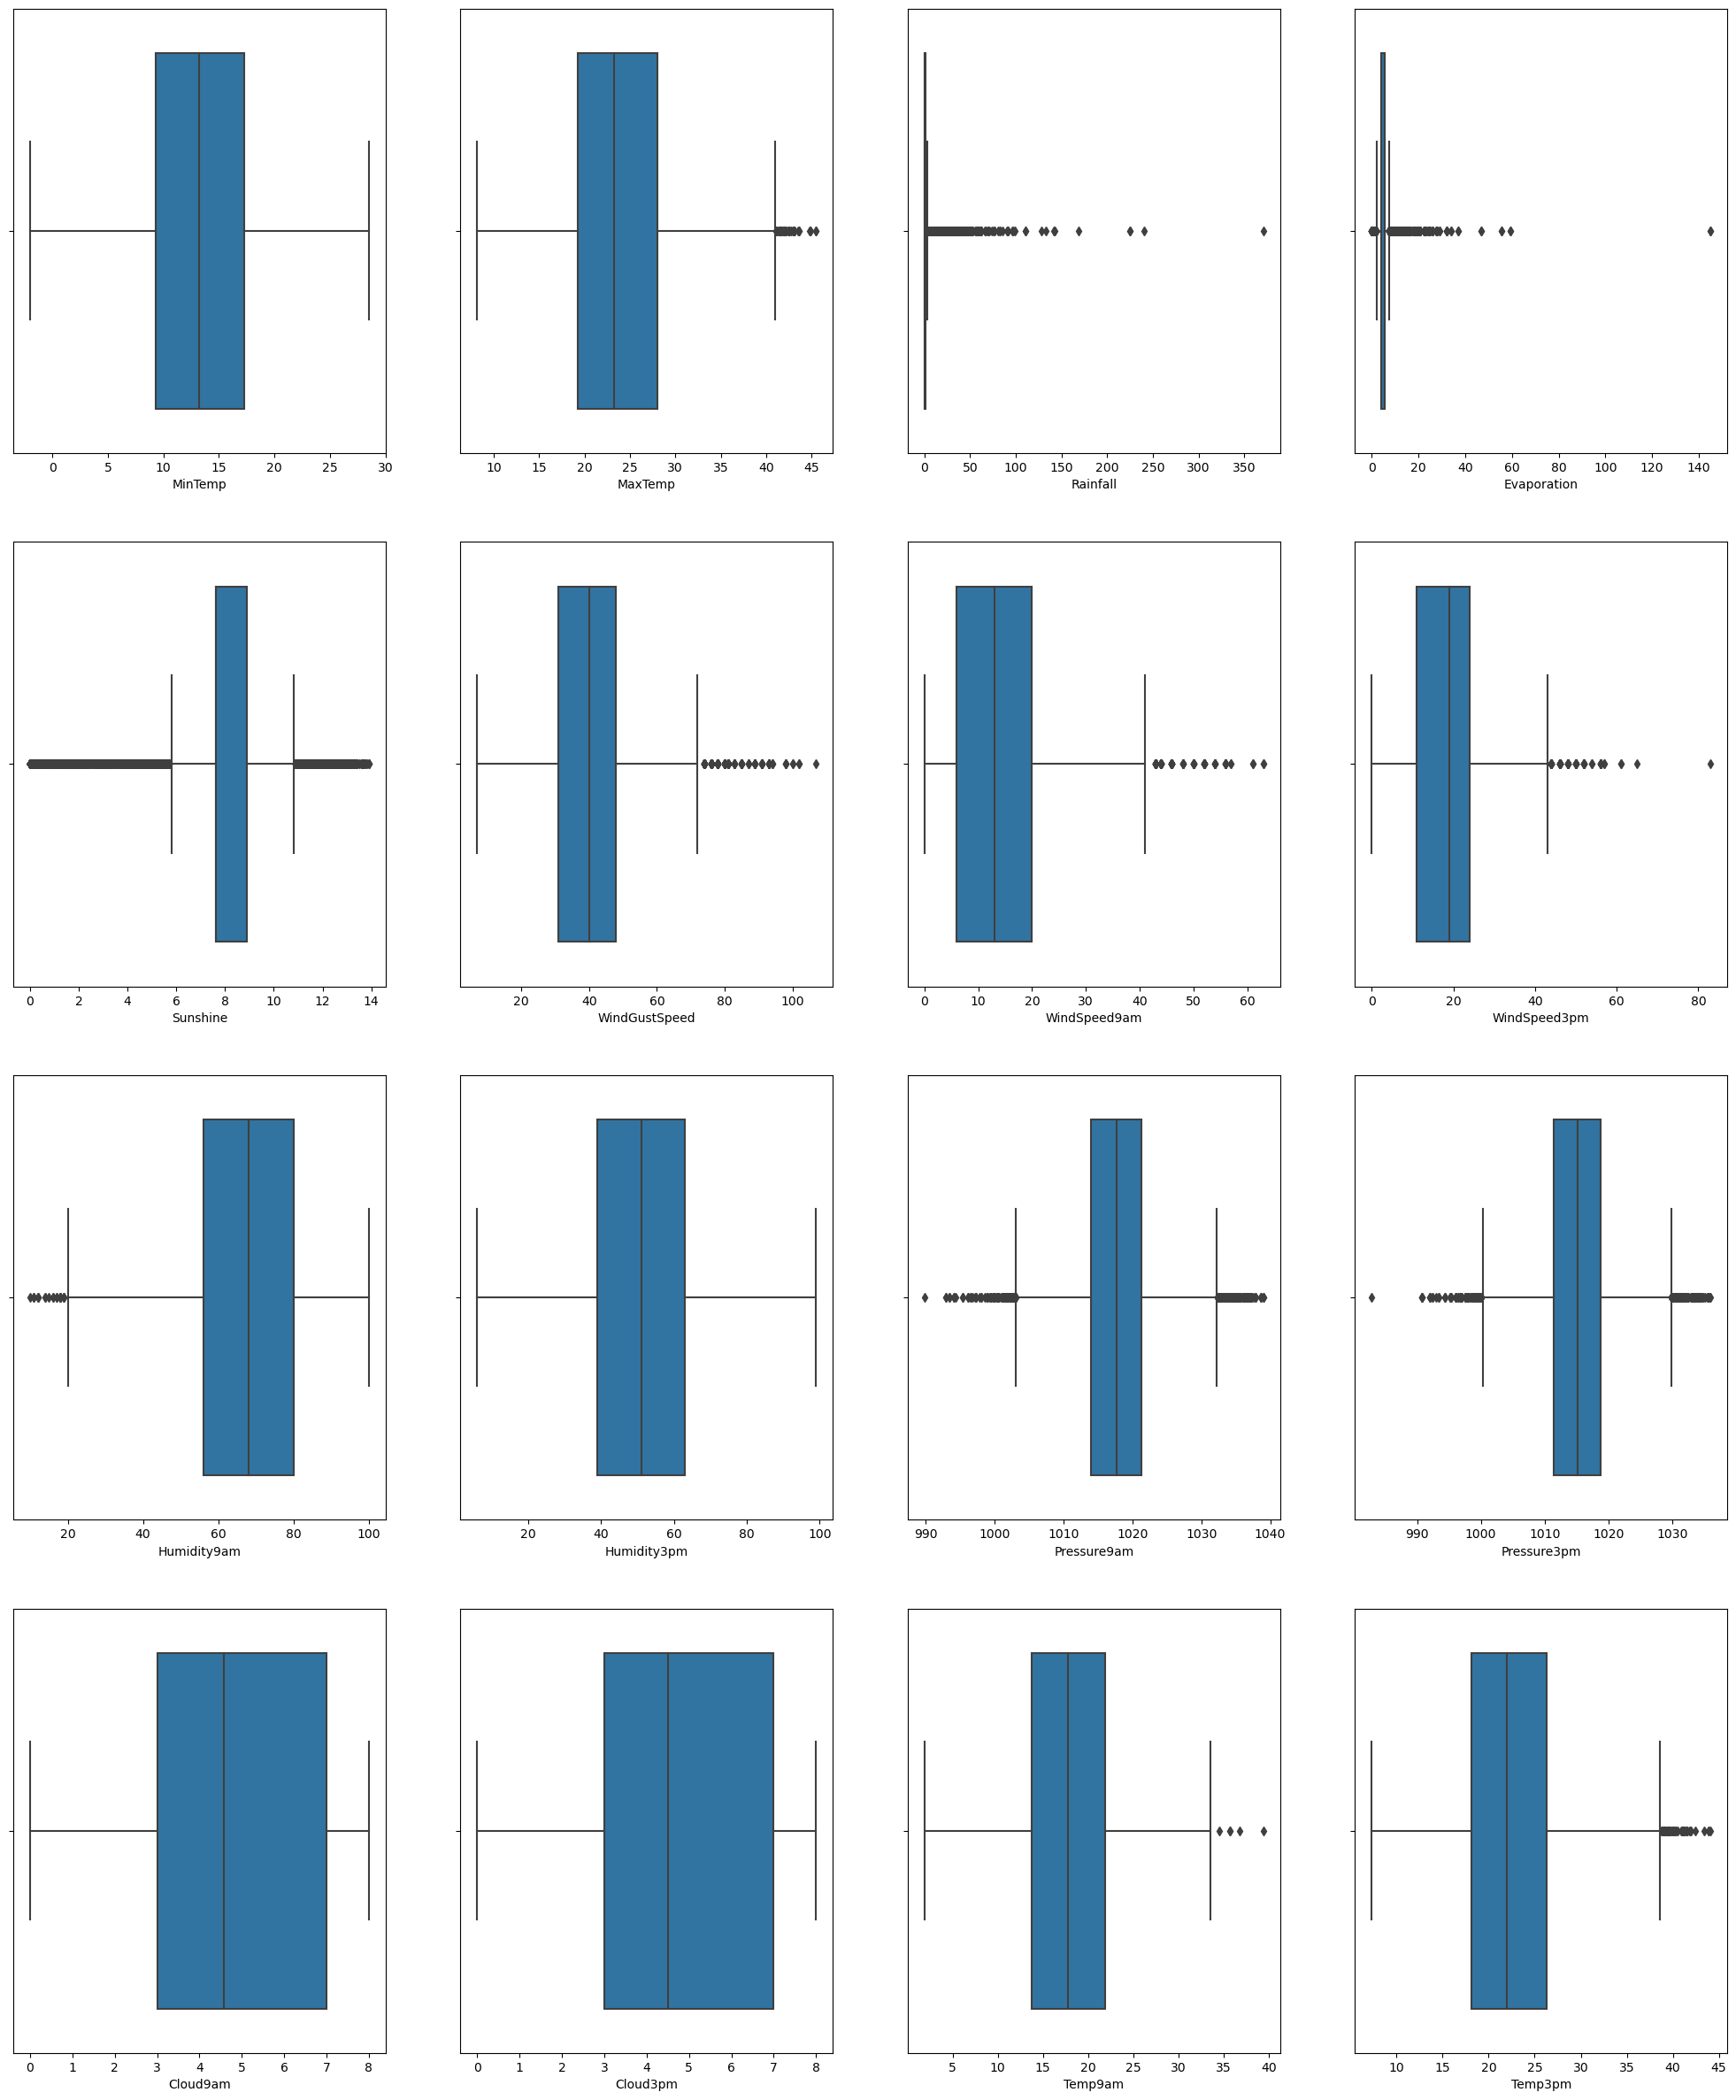

In [21]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in weather.columns:
    if pd.api.types.is_numeric_dtype(weather[column]):
        if plotnumber<=16:
            ax = plt.subplot(4,4,plotnumber)
            sns.boxplot(weather[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

from above i confirmed that there are outliers and it also contains no null values. to remove the outliers I will adopt zscore or iqr method. i will adopt anyone first one that fall to the accepatble range of data loss

In [22]:
from scipy.stats import zscore,boxcox
from scipy import stats

In [23]:
weather1 = weather[['MaxTemp','Sunshine','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
scores = np.abs(zscore(weather1))

In [24]:
new_weather =weather[(scores<3).all(axis=1)]
new_weather.shape

(7987, 22)

In [25]:
new_weather.reset_index().head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [26]:
print('Data Loss:',((weather.shape[0]-new_weather.shape[0])/weather.shape[0])*100)

Data Loss: 5.198813056379822


since the zscore is within the acceptable range of data loss, i then move on with it

In [27]:
new_weather.columns.to_frame('list of columns in new_weather')

,0
Location,Location
MinTemp,MinTemp
MaxTemp,MaxTemp
Rainfall,Rainfall
Evaporation,Evaporation
Sunshine,Sunshine
WindGustDir,WindGustDir
WindGustSpeed,WindGustSpeed
WindDir9am,WindDir9am
WindDir3pm,WindDir3pm


In [28]:
new_weather.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

In [29]:
new_weather['WindSpeed9am']= np.cbrt(new_weather['WindSpeed9am'])
new_weather['Rainfall']= np.cbrt(new_weather['Rainfall'])
new_weather['Sunshine']= np.cbrt(new_weather['Sunshine'])
new_weather['Evaporation']= np.cbrt(new_weather['Evaporation'])

In [30]:
new_weather.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         1.319083
Evaporation     -0.967518
Sunshine        -2.856050
WindGustSpeed    0.506897
WindSpeed9am    -1.274070
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

In [31]:
new_weather['WindSpeed9am']= np.cbrt(new_weather['WindSpeed9am'])
new_weather['Rainfall']= np.cbrt(new_weather['Rainfall'])
new_weather['Sunshine']= np.sqrt(new_weather['Sunshine'])
new_weather['Evaporation']= np.cbrt(new_weather['Evaporation'])

In [32]:
new_weather.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         0.677819
Evaporation     -4.764038
Sunshine        -4.554994
WindGustSpeed    0.506897
WindSpeed9am    -2.531638
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

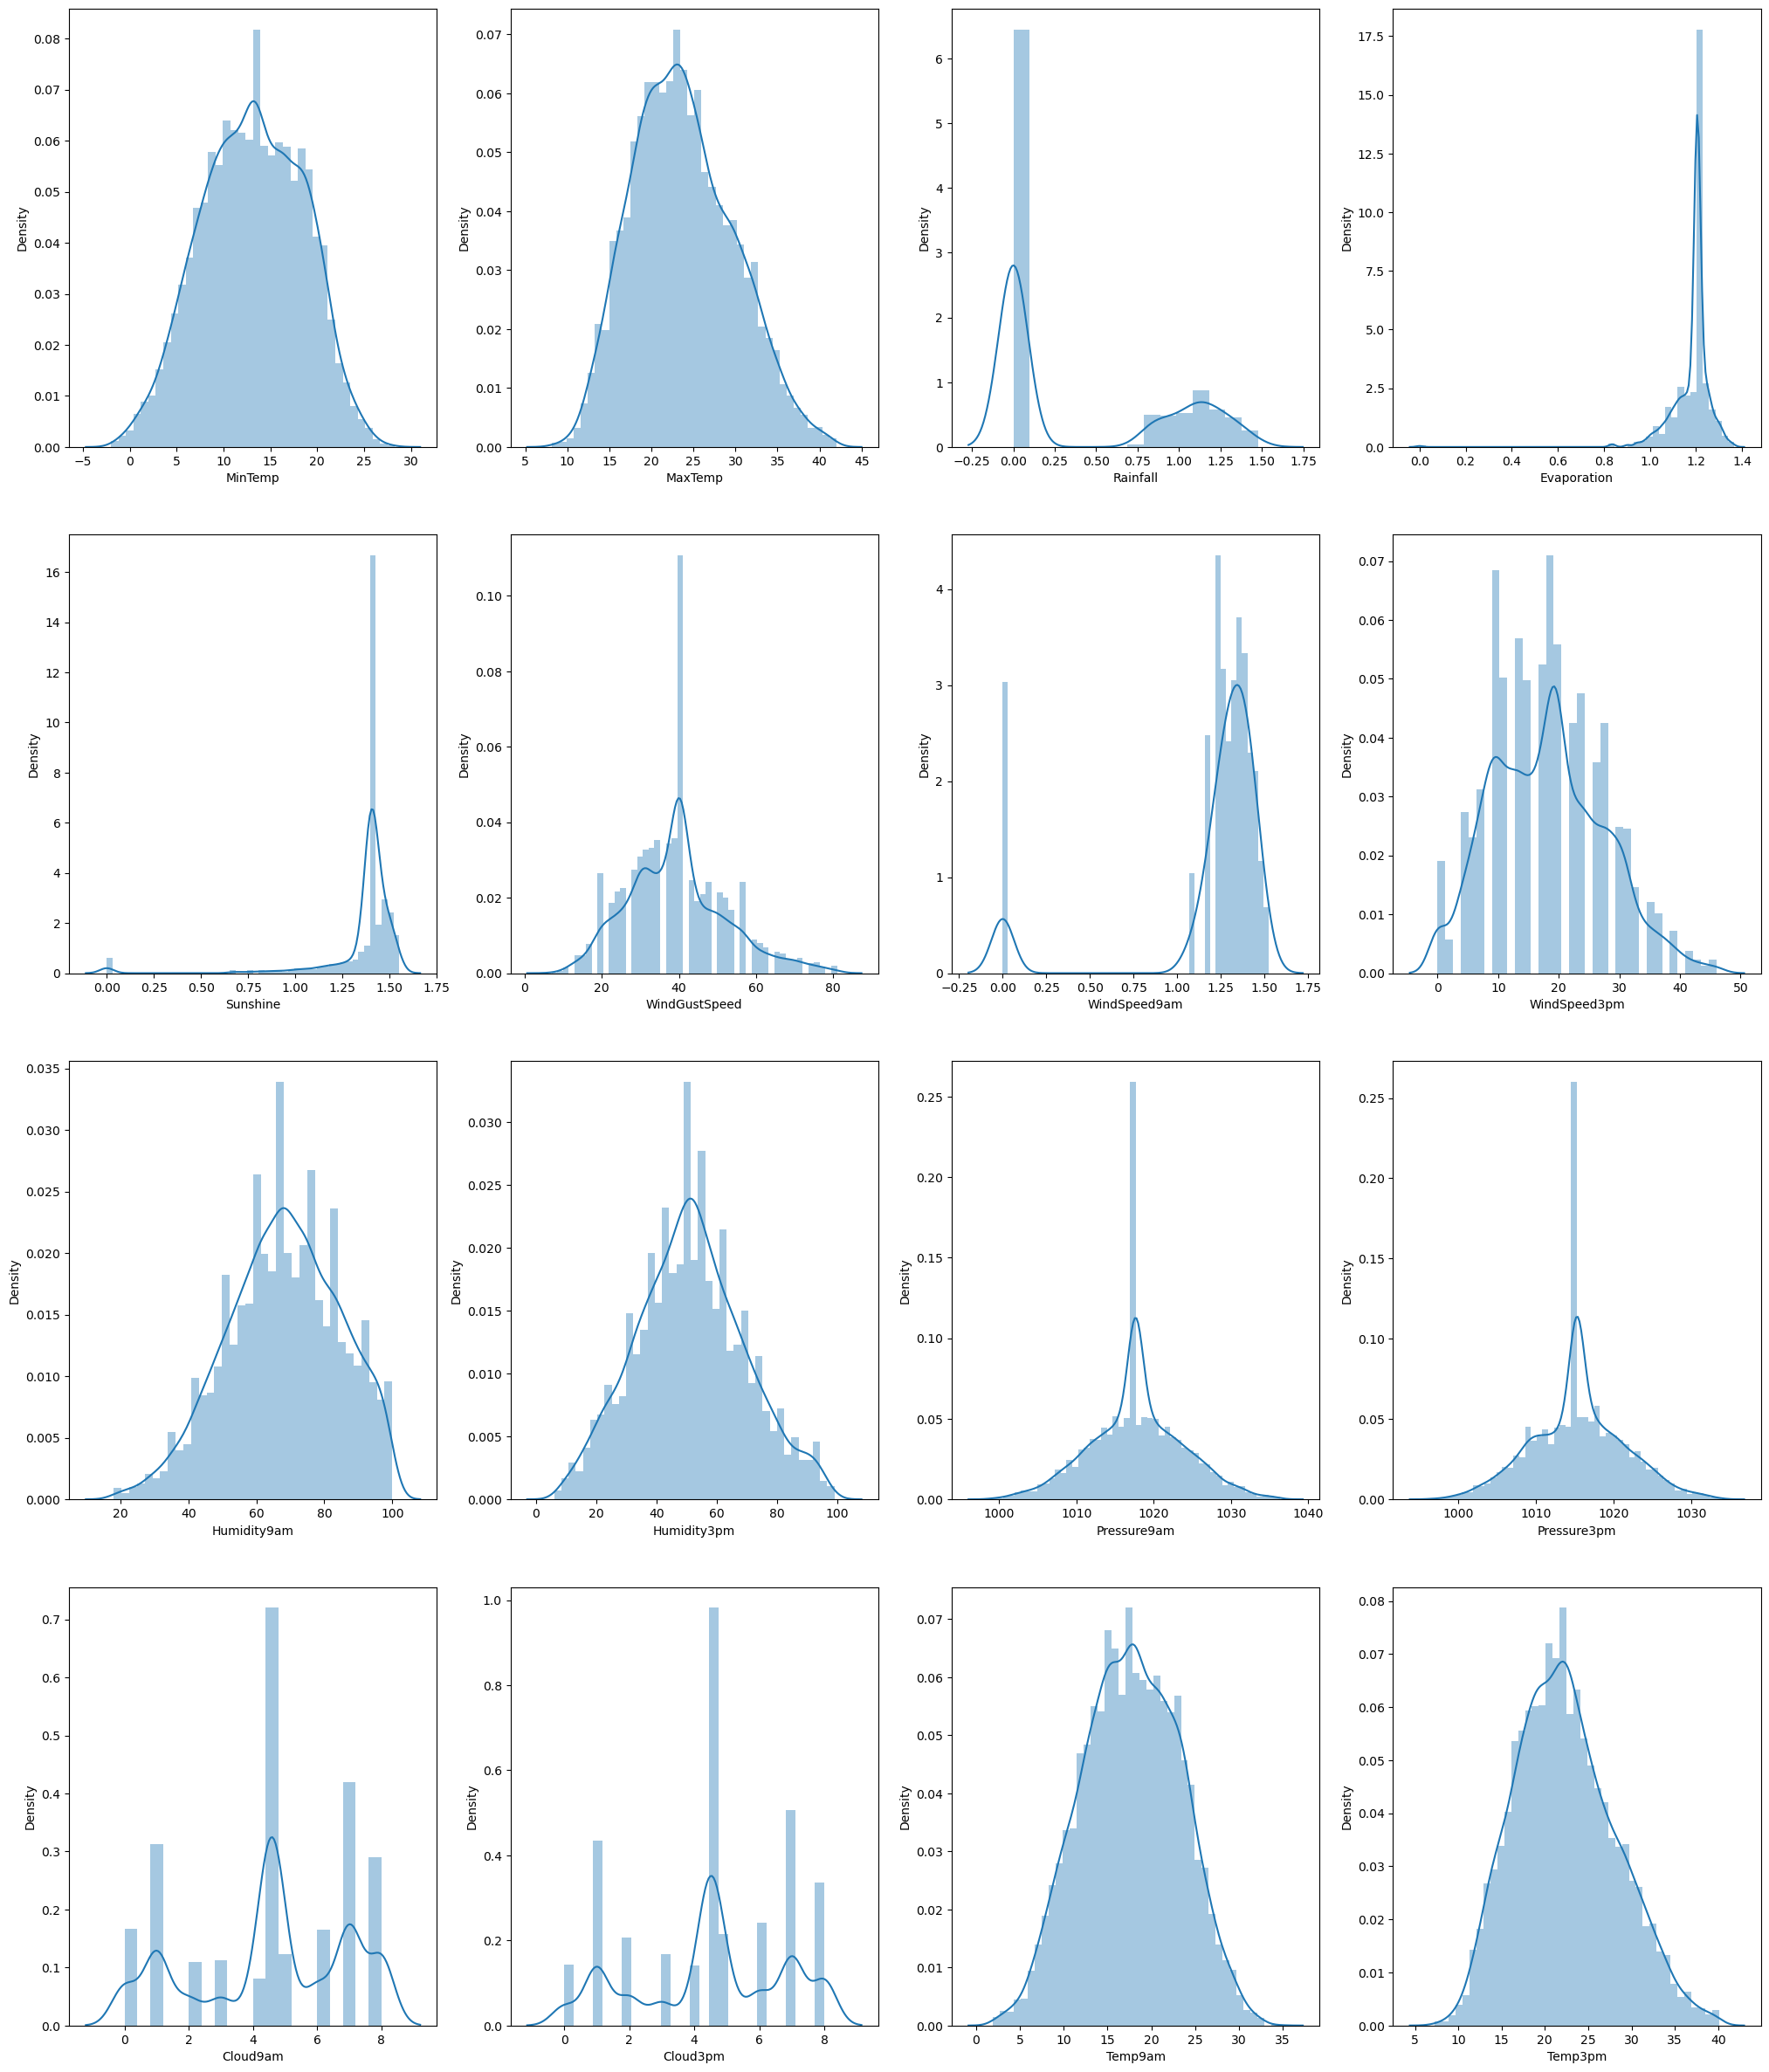

In [33]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in new_weather.columns:
    if pd.api.types.is_numeric_dtype(new_weather[column]):
        if plotnumber<=16:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(new_weather[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

i can see the date is almost distributted so i want to convert the object to numerical before moving on so i can start building the model

In [34]:
Encode = OrdinalEncoder()
for i in new_weather.columns:
    if new_weather[i].dtypes =='object':
        new_weather[i] = Encode.fit_transform(new_weather[i].values.reshape(-1,1))
new_weather

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1.0,13.4,22.900000,0.944822,1.205819,1.403164,13.0,44.000000,13.0,14.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
2008-12-02,1.0,7.4,25.100000,0.000000,1.205819,1.403164,14.0,44.000000,6.0,15.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2008-12-03,1.0,12.9,25.700000,0.000000,1.205819,1.403164,15.0,46.000000,13.0,15.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
2008-12-04,1.0,9.2,28.000000,0.000000,1.205819,1.403164,4.0,24.000000,9.0,0.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
2008-12-05,1.0,17.5,32.300000,1.000000,1.205819,1.403164,13.0,41.000000,1.0,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,9.0,2.8,23.400000,0.000000,1.205819,1.403164,0.0,31.000000,9.0,1.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
2017-06-22,9.0,3.6,25.300000,0.000000,1.205819,1.403164,6.0,22.000000,9.0,3.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
2017-06-23,9.0,5.4,26.900000,0.000000,1.205819,1.403164,3.0,37.000000,9.0,14.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0


In [35]:
new_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7987 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7987 non-null   float64
 1   MinTemp        7987 non-null   float64
 2   MaxTemp        7987 non-null   float64
 3   Rainfall       7987 non-null   float64
 4   Evaporation    7987 non-null   float64
 5   Sunshine       7987 non-null   float64
 6   WindGustDir    7987 non-null   float64
 7   WindGustSpeed  7987 non-null   float64
 8   WindDir9am     7987 non-null   float64
 9   WindDir3pm     7987 non-null   float64
 10  WindSpeed9am   7987 non-null   float64
 11  WindSpeed3pm   7987 non-null   float64
 12  Humidity9am    7987 non-null   float64
 13  Humidity3pm    7987 non-null   float64
 14  Pressure9am    7987 non-null   float64
 15  Pressure3pm    7987 non-null   float64
 16  Cloud9am       7987 non-null   float64
 17  Cloud3pm       7987 non-null   flo

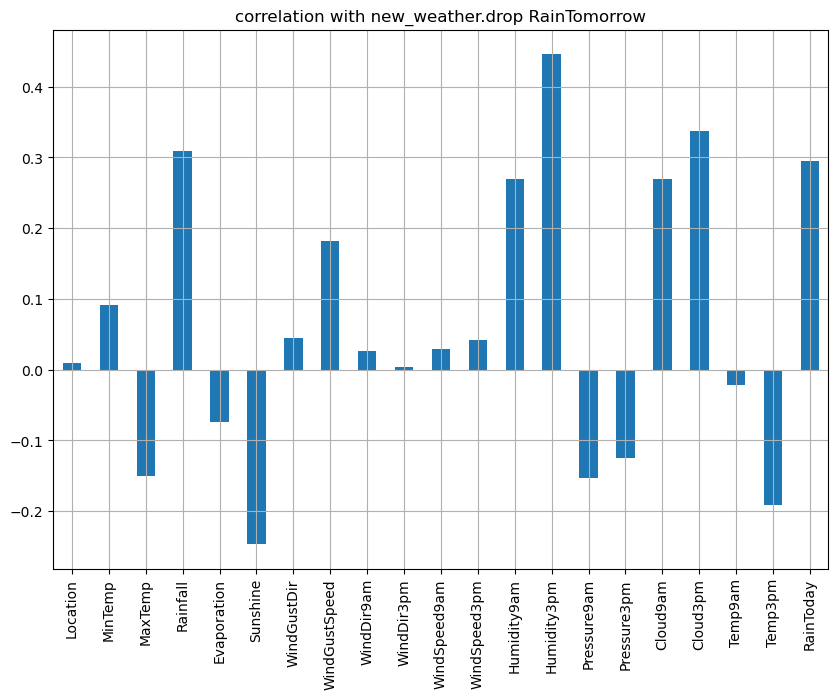

In [36]:
new_weather.drop('RainTomorrow', axis=1).corrwith(new_weather.RainTomorrow).plot(kind='bar',grid =True, figsize = (10,7),
                                                                        title = 'correlation with new_weather.drop RainTomorrow')


plt.show()


In [37]:
new_weather['RainTomorrow'].value_counts()

0.0    6165
1.0    1822
Name: RainTomorrow, dtype: int64

In [38]:
Features = new_weather.drop(columns = ['RainTomorrow'])
Label = new_weather['RainTomorrow']

In [39]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
Features1,Label1 = SM.fit_resample(Features,Label)

In [40]:
Label1.value_counts()

0.0    6165
1.0    6165
Name: RainTomorrow, dtype: int64

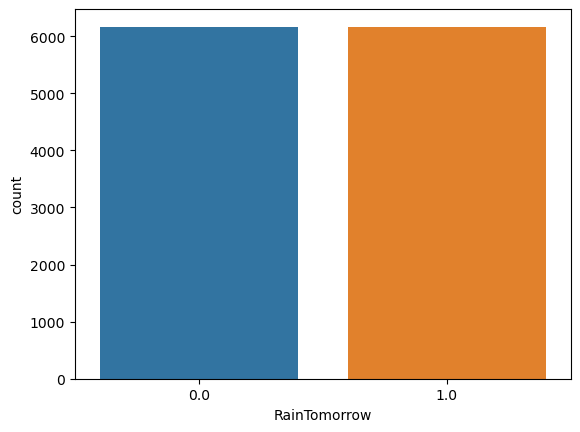

In [41]:
sns.countplot(x=Label1)
plt.show()

In [42]:
Label1.unique()

array([0., 1.])

In [43]:
Features1.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

In [45]:
best_features = SelectKBest(score_func = f_classif, k = 21)
fit = best_features.fit(Features1,Label1)
weather_scores = pd.DataFrame(fit.scores_)
weather_columns = pd.DataFrame(Features1.columns)
features_scores = pd.concat([weather_columns, weather_scores], axis = 1)
features_scores.columns = ['Features_name', 'Score']
print(features_scores.nlargest(21, 'Score'))

    Features_name        Score
13    Humidity3pm  4222.442230
17       Cloud3pm  2639.697780
3        Rainfall  1845.022318
16       Cloud9am  1604.877075
20      RainToday  1529.284428
12    Humidity9am  1501.777494
5        Sunshine   869.400538
19        Temp3pm   698.638186
7   WindGustSpeed   536.392437
2         MaxTemp   441.614149
14    Pressure9am   385.414642
15    Pressure3pm   247.287223
1         MinTemp   154.429693
4     Evaporation   129.515191
6     WindGustDir    30.845275
11   WindSpeed3pm    25.954761
8      WindDir9am    15.951588
10   WindSpeed9am    10.994638
18        Temp9am     9.401054
0        Location     4.335888
9      WindDir3pm     1.620211


In [46]:
new_feature = Features1[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp3pm','RainToday','WindGustDir','WindSpeed3pm','Temp9am']]

In [47]:
new_feature.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,WindGustDir,WindSpeed3pm,Temp9am
0,13.4,22.9,0.944822,1.205819,1.403164,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,21.8,0.0,13.0,24.0,16.9
1,7.4,25.1,0.000000,1.205819,1.403164,44.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,24.3,0.0,14.0,22.0,17.2
2,12.9,25.7,0.000000,1.205819,1.403164,46.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,23.2,0.0,15.0,26.0,21.0
3,9.2,28.0,0.000000,1.205819,1.403164,24.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,26.5,0.0,4.0,9.0,18.1
4,17.5,32.3,1.000000,1.205819,1.403164,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,29.7,0.0,13.0,20.0,17.8


In [48]:
new_feature.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,WindGustDir,WindSpeed3pm,Temp9am
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,13.415451,23.171207,0.514027,1.177919,1.330100,40.798805,70.909976,56.537418,1017.260173,1014.964570,4.965290,4.973891,21.653269,0.307028,7.333751,18.324028,17.584199
std,5.264129,5.874793,0.556187,0.085038,0.245280,13.298670,16.259870,19.064311,5.919481,5.868466,2.307883,2.197592,5.745148,0.441819,4.537884,9.408996,5.442071
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,18.000000,6.000000,999.000000,996.700000,0.000000,0.000000,7.300000,0.000000,0.000000,0.000000,1.900000
25%,9.598823,18.853113,0.000000,1.152585,1.355393,31.000000,60.000000,44.000000,1013.680816,1011.171549,4.000000,4.039551,17.500000,0.000000,3.000000,11.000000,13.600000
50%,13.300000,22.700000,0.066770,1.205819,1.403164,40.174469,72.000000,56.000000,1017.640233,1015.236075,4.753121,4.769418,21.300000,0.000000,7.579154,18.595442,17.600000
75%,17.600000,27.000000,1.112009,1.205819,1.403164,48.042407,83.211826,70.000000,1020.576093,1018.200000,7.000000,7.000000,25.300000,1.000000,11.063345,24.595722,21.522619
max,28.300000,42.000000,1.476744,1.366368,1.550610,81.000000,100.000000,99.000000,1036.300000,1033.800000,8.000000,8.000000,40.100000,1.000000,15.000000,46.000000,34.500000


In [49]:
scaler = StandardScaler()
New_Features = pd.DataFrame(scaler.fit_transform(new_feature),columns = new_feature.columns)
New_Features.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,WindGustDir,WindSpeed3pm,Temp9am
0,-0.002935,-0.046166,0.774582,0.328109,0.29789,0.240725,0.005537,-1.811700,-1.615101,-1.340195,1.314986,-0.214202,0.025541,-0.694946,1.248705,0.603274,-0.125729
1,-1.142771,0.328330,-0.924235,0.328109,0.29789,0.240725,-1.655060,-1.654332,-1.125173,-1.220909,-0.172749,-0.214202,0.460708,-0.694946,1.469081,0.390703,-0.070601
2,-0.097922,0.430465,-0.924235,0.328109,0.29789,0.391122,-2.024082,-1.392051,-1.631995,-1.067540,-0.172749,-1.353305,0.269235,-0.694946,1.689457,0.815845,0.627691
3,-0.800820,0.821984,-0.924235,0.328109,0.29789,-1.263246,-1.593557,-2.126437,0.057411,-0.368863,-0.172749,-0.214202,0.843656,-0.694946,-0.734678,-0.991010,0.094784
4,0.775953,1.553955,0.873793,0.328109,0.29789,0.015130,0.682076,-1.234683,-1.091385,-1.527645,0.881671,1.377067,1.400670,-0.694946,1.248705,0.178132,0.039656


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [51]:
x_train,x_test,y_train,y_test = train_test_split(New_Features,Label1, test_size = 0.25, random_state = 150)

In [52]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n_____________________train result_____________________')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)}')
    elif train==False:
        pred = clf.predict(x_test)
        print('\n_____________________train result_____________________')
        print(f'accuracy score: {accuracy_score(y_test,pred)}')
        print('*\n   \n test classification report \n',classification_report(y_test,pred,digits=2))

In [53]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


_____________________train result_____________________
accuracy score: 0.9060235752135828

_____________________train result_____________________
accuracy score: 0.8537139150178398
*
   
 test classification report 
               precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      1543
         1.0       0.80      0.94      0.86      1540

    accuracy                           0.85      3083
   macro avg       0.86      0.85      0.85      3083
weighted avg       0.86      0.85      0.85      3083



In [55]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc = bc.predict(x_test)
pred_train = bc.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_bc))
print ('confusion matrix:', confusion_matrix(y_test,pred_bc))
print ('classification report:', classification_report(y_test,pred_bc))

accuracy score: 0.91566655854687
confusion matrix: [[1439  104]
 [ 156 1384]]
classification report:               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      1543
         1.0       0.93      0.90      0.91      1540

    accuracy                           0.92      3083
   macro avg       0.92      0.92      0.92      3083
weighted avg       0.92      0.92      0.92      3083



In [56]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)
pred_train = gbc.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_gbc))
print ('confusion matrix:', confusion_matrix(y_test,pred_gbc))
print ('classification report:', classification_report(y_test,pred_gbc))

accuracy score: 0.8537139150178398
confusion matrix: [[1343  200]
 [ 251 1289]]
classification report:               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1543
         1.0       0.87      0.84      0.85      1540

    accuracy                           0.85      3083
   macro avg       0.85      0.85      0.85      3083
weighted avg       0.85      0.85      0.85      3083



In [57]:
cross_val_score(knn,New_Features,Label1,cv=5)
cross_val_score(knn,New_Features,Label1,cv=5).mean()

0.8044606650446067

In [58]:
cross_val_score(bc,New_Features,Label1,cv=5)
cross_val_score(bc,New_Features,Label1,cv=5).mean()

0.8463909164639093

In [59]:
cross_val_score(gbc,New_Features,Label1,cv=5)
cross_val_score(gbc,New_Features,Label1,cv=5).mean()

0.7787510137875102

i choose knn as my best model since it has lowest mean cross validation score

In [60]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_neighbors':[1,3,5,8],
             'p':[2.5,3.5,5.5,12.5],
              'n_jobs':[5,10,15,30,35],
             }
grid_search =GridSearchCV(estimator=knn, param_grid = params_grid, cv = 5)


In [61]:
grid_search.fit(x_train,y_train)
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'n_jobs': 5, 'n_neighbors': 1, 'p': 2.5}


In [63]:
final_model = KNeighborsClassifier(n_jobs= 5, n_neighbors= 1, p=2.5)
final_model

KNeighborsClassifier(n_jobs=5, n_neighbors=1, p=2.5)

In [64]:
final_model.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_knn))
print ('confusion matrix:', confusion_matrix(y_test,pred_knn))
print ('classification report:', classification_report(y_test,pred_knn))

accuracy score: 0.8537139150178398
confusion matrix: [[1191  352]
 [  99 1441]]
classification report:               precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      1543
         1.0       0.80      0.94      0.86      1540

    accuracy                           0.85      3083
   macro avg       0.86      0.85      0.85      3083
weighted avg       0.86      0.85      0.85      3083



In [65]:
from sklearn import metrics

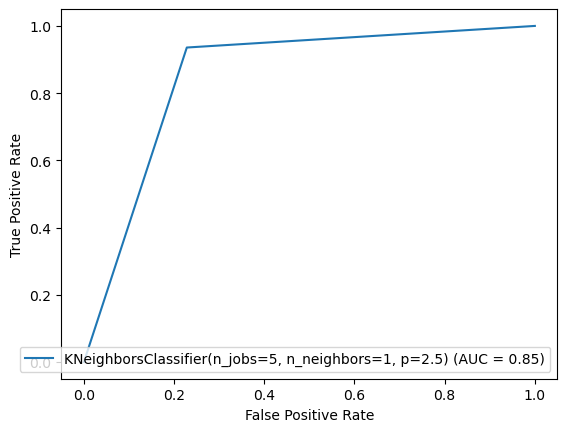

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_knn)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()

In [68]:
import joblib
import pickle
filename = 'Insurance.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [69]:
import pickle
loaded_final_model=pickle.load(open(filename,'rb'))
result = loaded_final_model.score(x_test,y_test)
print(result*100)

91.30716834252351
